## SNUM

Dawid Stasiak 148112

Miłosz Matuszewski 148185

# 7. Homework
You are given a dataset containing information about 1600 red wines (winequality.csv) containing 11 attributes and assignment to one of the three wine quality classess: "poor", "medium" and "good". Perform a preprocessing of this dataset (normalization, standardization). Divide this set into the train and test sets. Choose experimentally the best value of k (using cross-validation) and perform classification using the  k-nn algoritm with the chosen k value. Write a report containing information about the used preprocessing methods, chosen train/test split method (percentage of examples in train/test sets, if shuffling or stratification used), plot of the accuracy depending of k parameter, finally chosen k and obtained classification accuracy on a test set.

**Deadline +2 weeks**

In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

Odczyt danych i podział na cechy i klasy.

In [32]:
df = pd.read_csv('winequality.csv')

x = df.drop('quality', axis=1)
y = df['quality']

Normalizacja i standaryzacja danych za pomocą `StandardScaler()`

In [33]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

Podział danych na zbiór treningowy (80%) i testowy (20%) ze stratyfikacją (zachowanie proporcji klas).

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=5)

Eksperymentalne wyznaczenie najlepszej wartości `k`.

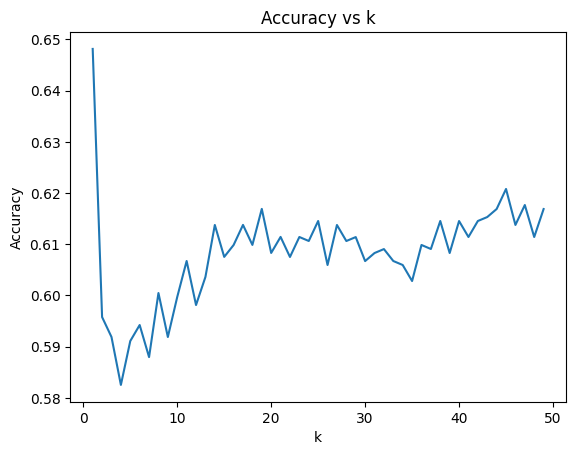

Best k: 1


In [35]:
k_values = list(range(1, 50))
accuracy_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_validate(knn, x_train, y_train, cv=5, scoring='accuracy')
    accuracy_scores.append(scores['test_score'].mean())

plt.plot(k_values, accuracy_scores)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()

best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print('Best k:', best_k)

Użycie najlepszej wartości `k` do przeprowadzenia klasyfikacji.

In [36]:

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)
test_accuracy = knn.score(x_test, y_test)

print('Accuracy:', test_accuracy)

Accuracy: 0.69375
